# Bohr–Sommerfeld quantization condition (lab 1)

$$
V(x) = \begin{cases} 
\lambda x, &  -a \leq x \leq b, \\
\infty, &  x < -a, \quad x > b.
\end{cases}
$$

Energy levels:
Level 1: 0.34724228939237023
Level 2: 0.680527462213179
Level 3: 4.013957116571561
Level 4: 11.680671943750754
Level 5: 23.347386770929944
Level 6: 39.014101598109136


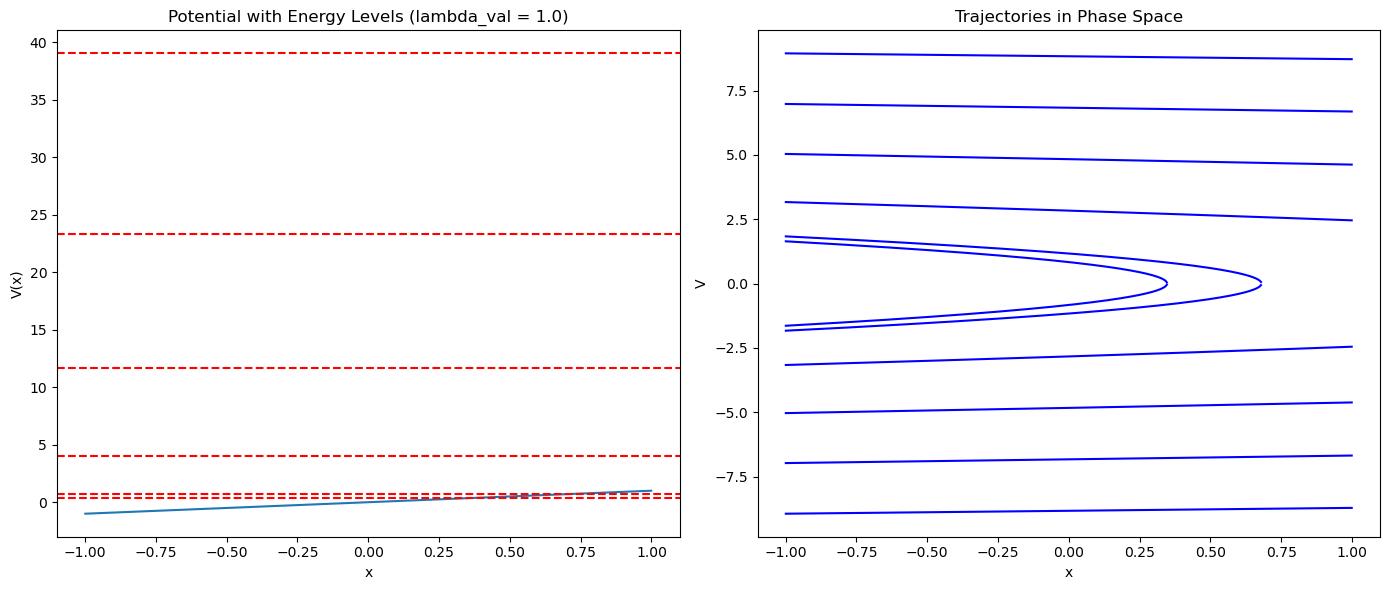

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
warnings.filterwarnings("ignore")


# Potential parameters
lambda_val = 1.0
a = 1.0
b = 1.0

def potential(x):
    return np.where((-a <= x) & (x <= b), lambda_val * x, np.inf)

# Function for minimization
def quantization_condition(E, k):
    x_values = np.linspace(-a, b, 1000)
    integral = np.trapz(np.sqrt(2 * (E - potential(x_values))) - k, x_values)
    return integral

# Finding energy levels
num_levels = 6
energies = []

for i in range(1, num_levels + 1):
    result = minimize_scalar(quantization_condition, args=(i - 0.25,), bounds=(0, 10))
    energies.append(result.fun**2 / 2)

energies = np.sort(energies)

# Normalization of energy levels for better visualization
#energies_norm = (energies - min(energies)) / (max(energies) - min(energies))

print("Energy levels:")
for i, energy in enumerate(energies):
    print(f"Level {i + 1}: {energy}")

# Plotting Potential and Energy Levels
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
x_values = np.linspace(-a - 1, b + 1, 1000)
V_values = potential(x_values)

plt.plot(x_values, V_values, label="Potential")
for i, energy in enumerate(energies):
    plt.axhline(y=energy, color="r", linestyle="--", label=f"Level {i + 1}")

plt.title(f"Potential with Energy Levels (lambda_val = {lambda_val})")
plt.xlabel("x")
plt.ylabel("V(x)")
#plt.legend()

# Plotting phase trajectories
plt.subplot(1, 2, 2)
for k in range(num_levels):
    m = 0
    h = len(x_values)

    while energies[k] <= potential(x_values[m]):
        m += 1

    while energies[k] <= potential(x_values[h - 1]):
        h -= 1

    x1_values = x_values[m:h]
    V1_values = potential(x1_values)

    plt.plot(x1_values, np.sqrt(2 * (energies[k] - V1_values)), "-b", label=f'Trajectory Level {k + 1}')
    plt.plot(x1_values, -np.sqrt(2 * (energies[k] - V1_values)), "-b")

plt.title("Trajectories in Phase Space")
plt.xlabel("x")
plt.ylabel("V")
#plt.legend()

plt.tight_layout()
plt.show()
